 # Data Profiling Playbook
 The intention of this notebook is to develop a generic approach to profiling a single column.
 This will take into account:
 - The primary data type of the column - eg if it's a date, we can generate more specialised analytics
 - We may also be able to apply more specialised checks, for example based on REGEX to check national insurance numbers etc.

In [1]:
# Import all of the libraries we need to use...
import pandas as pd
import azureml.dataprep as dprep
import os as os
import re as re
import collections
import seaborn as sns
import pandas_profiling as pp
import datetime
from datetime import datetime
from azureml.dataprep import value
from azureml.dataprep import col
from azureml.dataprep import Dataflow
from commonCode import savePackage, openPackage, createFullPackagePath



In [2]:
# Not used fo now, but should be driven by:
stageNumber = '1'
dataName = 'PEOPLE'
qualityFlag = 'A'
noMissingFlag = True

# For now, I'm cheating, just specifying file.  But will use helper function to build ultimately:
dataFlowFile = './packages/PEOPLE/2/PEOPLE_A_package.dprep'
indexColumn = 'ID'
targetColumn = 'DOB'

In [3]:
dataFlow = Dataflow.open(dataFlowFile)


In [4]:
dataFlow = dataFlow.keep_columns([indexColumn, targetColumn])


In [5]:
dataProfile = dataFlow.get_profile()


In [6]:
dataProfile


,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent missing,Error Count,Empty count,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
DOB,FieldType.DATE,1900-01-01 00:00:00+00:00,2008-10-25 00:00:00+00:00,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
ID,FieldType.INTEGER,17936,36765,19147.0,1.0,19146.0,0.000052,0.0,0.0,17957.5,19834.1,19741,22621.6,27301.9,31965.1,35744,36546.7,36743.4,27298.8,5400.8,2.91686e+07,0.0072681,-1.19487


In [7]:
columnDataProfile = dataProfile.columns[targetColumn]


In [8]:
columnDataProfile


,Statistics
Type,FieldType.DATE
Min,1900-01-01 00:00:00+00:00
Max,2008-10-25 00:00:00+00:00
Count,19147
Missing Count,1
Not Missing Count,19146
Percent missing,5.22275e-05
Error Count,0
Empty count,0
0.1% Quantile,


In [9]:
if columnDataProfile.type == 'FieldType.DATE':
    print('Date Field Detected!')
    # NOTE - what do I need to do to detect date field?


In [10]:
# Add year
columnByExampleBuilder = dataFlow.builders.derive_column_by_example(source_columns = [targetColumn], new_column_name = 'Year')
columnByExampleBuilder.add_example(source_data = {targetColumn : '2008-10-25 00:00:00'}, example_value = '2008')
columnByExampleBuilder.preview()
dataFlow = columnByExampleBuilder.to_dataflow()


In [11]:
# Add month
columnByExampleBuilder = dataFlow.builders.derive_column_by_example(source_columns = [targetColumn], new_column_name = 'Month')
columnByExampleBuilder.add_example(source_data = {targetColumn : '2008-10-25 00:00:00'}, example_value = 'October')
columnByExampleBuilder.preview()
dataFlow = columnByExampleBuilder.to_dataflow()


In [12]:
# Add day of month
columnByExampleBuilder = dataFlow.builders.derive_column_by_example(source_columns = [targetColumn], new_column_name = 'DayOfMonth')
columnByExampleBuilder.add_example(source_data = {targetColumn : '2008-10-25 00:00:00'}, example_value = '25')
columnByExampleBuilder.preview()
dataFlow = columnByExampleBuilder.to_dataflow()


In [13]:
# Add day of month
columnByExampleBuilder = dataFlow.builders.derive_column_by_example(source_columns = [targetColumn], new_column_name = 'DayOfWeek')
columnByExampleBuilder.add_example(source_data = {targetColumn : '2008-10-25 00:00:00'}, example_value = 'Saturday')
columnByExampleBuilder.preview()
dataFlow = columnByExampleBuilder.to_dataflow()


In [14]:
dataProfile = dataFlow.get_profile()


In [15]:
dataProfile


,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent missing,Error Count,Empty count,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
DOB,FieldType.DATE,1900-01-01 00:00:00+00:00,2008-10-25 00:00:00+00:00,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
DayOfWeek,FieldType.STRING,Friday,Wednesday,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
DayOfMonth,FieldType.STRING,1,9,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
Month,FieldType.STRING,April,September,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
Year,FieldType.STRING,1900,2008,19147.0,1.0,19146.0,0.000052,0.0,0.0,,,,,,,,,,,,,,
ID,FieldType.INTEGER,17936,36765,19147.0,1.0,19146.0,0.000052,0.0,0.0,17957.5,19834.1,19741,22621.6,27301.9,31965.1,35744,36546.7,36743.4,27298.8,5400.8,2.91686e+07,0.0072681,-1.19487


In [16]:
dataColumns = dataProfile.columns.keys()


In [17]:
dataColumns


odict_keys(['DOB', 'DayOfWeek', 'DayOfMonth', 'Month', 'Year', 'ID'])

In [18]:
for c in dataColumns:
    valueCounts = dataProfile.columns[c].value_counts
    if valueCounts == None:
        valueCountString = 'None'
    else:
        valueCountString = len(valueCounts)
    print('Column {0} : value count {1}'.format(c, valueCountString))



Column DOB : value count None
Column DayOfWeek : value count 8
Column DayOfMonth : value count 32
Column Month : value count 13
Column Year : value count 108
Column ID : value count None


In [19]:
def plotValueCounts(dataProfile,columnName):
    valueCounts = dataProfile.columns[columnName].value_counts
    if valueCounts != None:
        valueCountsDataFrame = pd.DataFrame(columns = ['ColumnName', 'Value', 'Count'])
        for i in valueCounts:
            valueCountsDataFrame = valueCountsDataFrame.append({ \
                'Column' : c, \
                'Value' : i.value, \
                'Count' : i.count}, \
                ignore_index = True)
        if len(valueCountsDataFrame) > 40:
            plot = sns.barplot(x='Value', y='Count', data=valueCountsDataFrame.head(20))
            plot
            plot = sns.barplot(x='Value', y='Count', data=valueCountsDataFrame.tail(20))
            plot
        else:
            plot = sns.barplot(x='Value', y='Count', data=valueCountsDataFrame)
            plot
    return plot


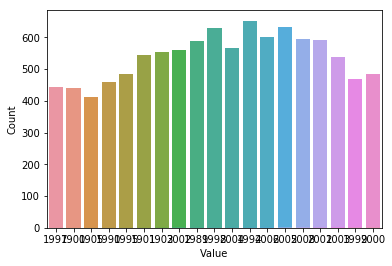

In [20]:
plot = plotValueCounts(dataProfile, 'Year')


In [21]:
plot


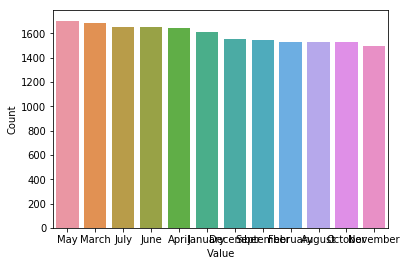

In [22]:
plot = plotValueCounts(dataProfile, 'Month')


In [23]:
plot


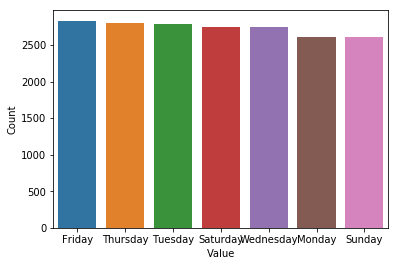

In [25]:
plot = plotValueCounts(dataProfile, 'DayOfWeek')


In [26]:
plot


In [27]:
dataProfileValues = dataProfile.columns.values()


In [28]:
dataProfileValues

odict_values([ColumnProfile:
    column_name: DOB
    type: FieldType.DATE

    min: 1900-01-01 00:00:00+00:00
    max: 2008-10-25 00:00:00+00:00
    count: 19147.0
    missing_count: 1.0
    not_missing_count: 19146.0
    percent_missing: 5.222750300308142e-05
    error_count: 0.0
    empty_count: 0.0

, ColumnProfile:
    column_name: DayOfWeek
    type: FieldType.STRING

    min: Friday
    max: Wednesday
    count: 19147.0
    missing_count: 1.0
    not_missing_count: 19146.0
    percent_missing: 5.222750300308142e-05
    error_count: 0.0
    empty_count: 0.0

, ColumnProfile:
    column_name: DayOfMonth
    type: FieldType.STRING

    min: 1
    max: 9
    count: 19147.0
    missing_count: 1.0
    not_missing_count: 19146.0
    percent_missing: 5.222750300308142e-05
    error_count: 0.0
    empty_count: 0.0

, ColumnProfile:
    column_name: Month
    type: FieldType.STRING

    min: April
    max: September
    count: 19147.0
    missing_count: 1.0
    not_missing_count: 19146.0


In [ ]:
df = dataFlow.to_pandas_dataframe()


In [ ]:
df = df.sort_values([targetColumn]).reset_index(drop=True)


In [ ]:
df


In [ ]:
profileReport = pp.ProfileReport(df, check_correlation = False)
profileReport.to_file('./profileReport.html')


In [ ]:
plot = sns.countplot(x="Year", data=df)


In [ ]:
plot